# Homework 10 #
## Robin James ##
# Problem 1 #


In [2]:
import numpy as np
rng = np.random.default_rng()

import matplotlib.pyplot as plt

import scipy.optimize as opt
import scipy.special as sf

#Globally fix plot styling
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)


In [3]:
def linear_leastsq(x,y,sigma=None):
    """ Returns the linear fit of the data set (x,y) in the form y=a_1+a_2x and uncertainties.
    Returns in the sructure ((a_1,a_2),(sigma_1, sigma_2)) """
    if sigma is None:
        sigma= np.ones_like(y)
    S=np.sum(1/sigma**2)
    Sx=np.sum(x/sigma**2)
    Sy=np.sum(y/sigma**2)
    Sxx=np.sum(x**2/sigma**2)
    Sxy=np.sum((x*y)/sigma**2)
    delta= S*Sxx-Sx**2
    # sys: a_1S+a_2Sx=Sy ; Sxy=a1Sx+a_2Sxx
    a_2=(S*Sxy-Sx*Sy)/delta
    a_1=(Sxx*Sy-Sx*Sxy)/delta
    sigma_1=np.sqrt(Sxx/delta)
    sigma_2= np.sqrt(S/delta)
    return ((a_1,a_2),(sigma_1,sigma_2))

In [7]:
x=np.arange(0,100,.5)
def f(x,y_0=0,m=1):
    return m*x+y_0
ytrue=f(x,1,2)
sigma_y=.1
y = ytrue + sigma_y * rng.normal(size=len(ytrue))
sigma_y = np.ones_like(y) * sigma_y
print(linear_leastsq(x,y,sigma=sigma_y))
opt.curve_fit(f,x,y,p0=(1,2),sigma=sigma_y,
absolute_sigma=True)

((0.9977512509921818, 2.0001138113360617), (0.014089267641952412, 0.00024495203619790746))


(array([0.99775125, 2.00011381]),
 array([[ 1.98507467e-04, -2.98507464e-06],
        [-2.98507464e-06,  6.00014994e-08]]))

True model :
chisq = 8.400000000000002
dof = 5
reduce chisq = 1.6800000000000004
goodness of fit = 0.13552522337752945


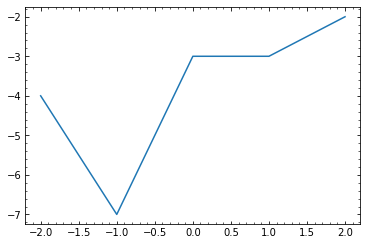

In [26]:
##Problem 2
x= np.arange(-2,3)
y=np.array([-4,-7,-3,-3,-2])
p,c=linear_leastsq(x,y)
chisq = np.sum(((y - f(x, *p)) )**2)
dof = len(y) # WHY?!
Q = sf.gammaincc(0.5*dof, 0.5*chisq)
print(f"""True model :
chisq = {chisq}
dof = {dof}
reduce chisq = { chisq/dof}
goodness of fit = {Q}""")
plt.plot(x,y)

In [27]:

#The x=-1 point is the outlier
x= np.array([-2,0,1,2])
y=np.array([-4,-3,-3,-2])
p,c=linear_leastsq(x,y)
chisq = np.sum(((y - f(x, *p)) )**2)
dof = len(y) # WHY?!
Q = sf.gammaincc(0.5*dof, 0.5*chisq)
print(f"""True model :
chisq = {chisq}
dof = {dof}
reduce chisq = { chisq/dof}
goodness of fit = {Q}""")

True model :
chisq = 0.17142857142857157
dof = 4
reduce chisq = 0.04285714285714289
goodness of fit = 0.9965298474674833
